In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC,SVR
from tqdm.notebook import tqdm as tqdm
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
plt.style.use("bmh")

# ML


This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

<b>The main goal is to estimate the pokemon speed</b>

### Q.1 

Read the attached "pokemon.csv" file to a DataFrame.

In [7]:
data = pd.read_csv("pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Q.2

Remove the "#" and "Name" columns.

In [11]:
data.drop(columns=["#", "Name"], inplace=True)
data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Q.3

Print the features name and type.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


### Q.4 

Handle the missing values in the dataset.

In [15]:
data.isna().sum() / len(data)

Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [16]:
data.drop(columns=["Type 2"], inplace=True)

In [17]:
data.isna().sum()

Type 1        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### Q.5

#### 5.1
Perform feature encoding on the categorical features. <br/>
For each categorical feature, create LabelEncoder and transform its values.

In [18]:
data.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False


In [19]:
# boolean
data.replace({ False:0, True:1}, inplace=True)
data.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,0
1,Grass,405,60,62,63,80,80,60,1,0
2,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0


In [21]:
le = LabelEncoder()
data["Type 1"] = le.fit_transform(data["Type 1"])
data.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,318,45,49,49,65,65,45,1,0
1,9,405,60,62,63,80,80,60,1,0
2,9,525,80,82,83,100,100,80,1,0
3,9,625,80,100,123,122,120,80,1,0
4,6,309,39,52,43,60,50,65,1,0


#### 5.2

split to (X,y).

In [22]:
X = data.drop(columns=["Speed"])
y = data["Speed"]

### Q.6

#### 6.1

Use RF and display the importance of each feature.

In [23]:
RF = RandomForestRegressor(n_estimators=200, random_state=1)
RF.fit(X,y)
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_ * 100
})
importances = importances.sort_values("Importance", ascending=False)
importances

,Feature,Importance
1,Total,45.130415
4,Defense,20.268620
2,HP,12.795445
5,Sp. Atk,6.186046
6,Sp. Def,5.246520
3,Attack,4.741218
0,Type 1,3.348565
7,Generation,2.055375
8,Legendary,0.227796


In [25]:
X.corr()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation,Legendary
Type 1,1.000000,0.023251,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.101129,-0.010162
Total,0.023251,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.048384,0.501758
HP,0.094230,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.058683,0.273620
Attack,-0.037525,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.051451,0.345408
Defense,0.103439,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.042419,0.246377
Sp. Atk,-0.006694,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.036437,0.448907
Sp. Def,0.018911,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.028486,0.363937
Generation,-0.101129,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,1.000000,0.079794
Legendary,-0.010162,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.079794,1.000000


In [26]:
X.cov()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation,Legendary
Type 1,31.140369,15.565288,13.427068,-6.796580,17.999881,-1.222378,2.936752,-0.937525,-0.015504
Total,15.565288,14391.130907,1895.360178,2866.571837,2292.356589,2933.303830,2395.697115,9.642619,16.455992
HP,13.427068,1895.360178,652.019323,350.068512,190.801755,302.787559,269.117875,2.489341,1.910114
Attack,-6.796580,2866.571837,350.068512,1053.480599,444.010210,420.967685,238.449434,2.774313,3.064980
Defense,17.999881,2292.356589,190.801755,444.010210,972.410707,228.108035,443.227428,2.197487,2.100422
Sp. Atk,-1.222378,2933.303830,302.787559,420.967685,228.108035,1070.748536,460.887309,1.980751,4.015895
Sp. Def,2.936752,2395.697115,269.117875,238.449434,443.227428,460.887309,774.448554,1.316962,2.768883
Generation,-0.937525,9.642619,2.489341,2.774313,2.197487,1.980751,1.316962,2.759886,0.036241
Legendary,-0.015504,16.455992,1.910114,3.064980,2.100422,4.015895,2.768883,0.036241,0.074742


#### 6.2

Remove features with importance less than 5%

In [27]:
X = X[["Total", "Defense", "HP", "Sp. Def"]]

In [28]:
X.head()

,Total,Defense,HP,Sp. Def
0,318,49,45,65
1,405,63,60,80
2,525,83,80,100
3,625,123,80,120
4,309,43,39,50


### Q.7

#### 7.1

Implement the function  `search_for_hyperparameters(X, y, model_name, model, param_grid)`

That gets as input:
* X - dataset
* y - target variable
* model_name - string
* model - Object
* param_grid

and perform GridSearchCV


In [30]:
def search_for_hyperparameters(X, y, model_name, model, param_grid):
    pipe = Pipeline([(model_name, model)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid.fit(X, y)
    print("Test set score: {:.2f}".format(grid.score(X, y))) # grade for training !!!!!!
    print("Best parameters: {}".format(grid.best_params_))

#### 7.2

Test your method on: AdaBoostRegressor, RandomForestRegressor, SVR, KNNR

* AdaBoostRegressor: learning_rate, range of [$10^{-4},10^{-3},10^{-2},10^{-1},10^{0}$]
* RandomForestRegressor: n_estimators, max_depth
* SVR: C (range as learning rate), gamma (range as learning rate)
* KNN: K [3,5,7,11,13], metric


In [37]:
params = {
    "ab": {
        "hp": {
        "ab__learning_rate": [10**-4, 10**-3, 10**-2, 10**-1, 1]
        },
        "model": AdaBoostRegressor()
    },
    "rf": {
        "hp": {
        "rf__n_estimators": list(range(50,350,50)),
        "rf__max_depth": [2,4,8,16,32]
        },
        "model": RandomForestRegressor()
    },
    "svr": {
        "hp": {
        "svr__C": [10**-4, 10**-3, 10**-2, 10**-1, 1],
        "svr__gamma": [10**-4, 10**-3, 10**-2, 10**-1, 1]
        },
        "model": SVR()
    },
    "knnr": {
        "hp": {
        "knnr__n_neighbors": [3,5,7,11,13],
        "knnr__p": [1,2]
    },
        "model": KNeighborsRegressor()
    }   
}

In [43]:
for model in params:
    print(model)
    obj = params[model]
    search_for_hyperparameters(X, y, model, obj["model"], obj["hp"])
    print("-" * 60)

ab
Test set score: 0.60
Best parameters: {'ab__learning_rate': 1}
------------------------------------------------------------
rf
Test set score: 0.85
Best parameters: {'rf__max_depth': 8, 'rf__n_estimators': 250}
------------------------------------------------------------
svr
Test set score: 0.54
Best parameters: {'svr__C': 1, 'svr__gamma': 0.0001}
------------------------------------------------------------
knnr
Test set score: 0.73
Best parameters: {'knnr__n_neighbors': 7, 'knnr__p': 2}
------------------------------------------------------------


### Q.7

Use LocalOutlierFactor (LOF) for anomaly detection. Plot the outliers ratio.

In [44]:
clf = LocalOutlierFactor(n_neighbors=11)
y_pred = clf.fit_predict(X)
X['isOutlier'] = y_pred
X

<ipython-input-44-1363942d42d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isOutlier'] = y_pred


,Total,Defense,HP,Sp. Def,isOutlier
0,318,49,45,65,1
1,405,63,60,80,1
2,525,83,80,100,1
3,625,123,80,120,1
4,309,43,39,50,1
...,...,...,...,...,...
795,600,150,50,150,-1
796,700,110,50,110,1
797,600,60,80,130,1
798,680,60,80,130,1


In [46]:
X["isOutlier"].value_counts(normalize=True)

 1    0.9125
-1    0.0875
Name: isOutlier, dtype: float64

In [49]:
X_new = X.drop(columns=["isOutlier"])
y_new = X["isOutlier"]

### Q.8

Use t-SNE and plot the compressed latent space with respect to the outliers.

In [47]:
def plot_tSNE(data, labels, perplexity=[5,20,30,50]):
    kl_divergence_iris = []
    fig, ax = plt.subplots(1, 4, figsize=(40, 8))
    for idx, p in enumerate(perplexity):
        tsne = TSNE(n_components=2, random_state=0, perplexity=p)
        tsne_data = tsne.fit_transform(data)
        kl_divergence_iris.append(tsne.kl_divergence_)
        tsne_data = np.vstack((tsne_data.T, labels)).T
        df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "Label"))
        sns.scatterplot(x=df['dim1'], y=df['dim2'], hue=df["Label"], ax=ax[idx], s=100,palette='colorblind').set_title("t-SNE with perplexity="+str(p))
    plt.show()

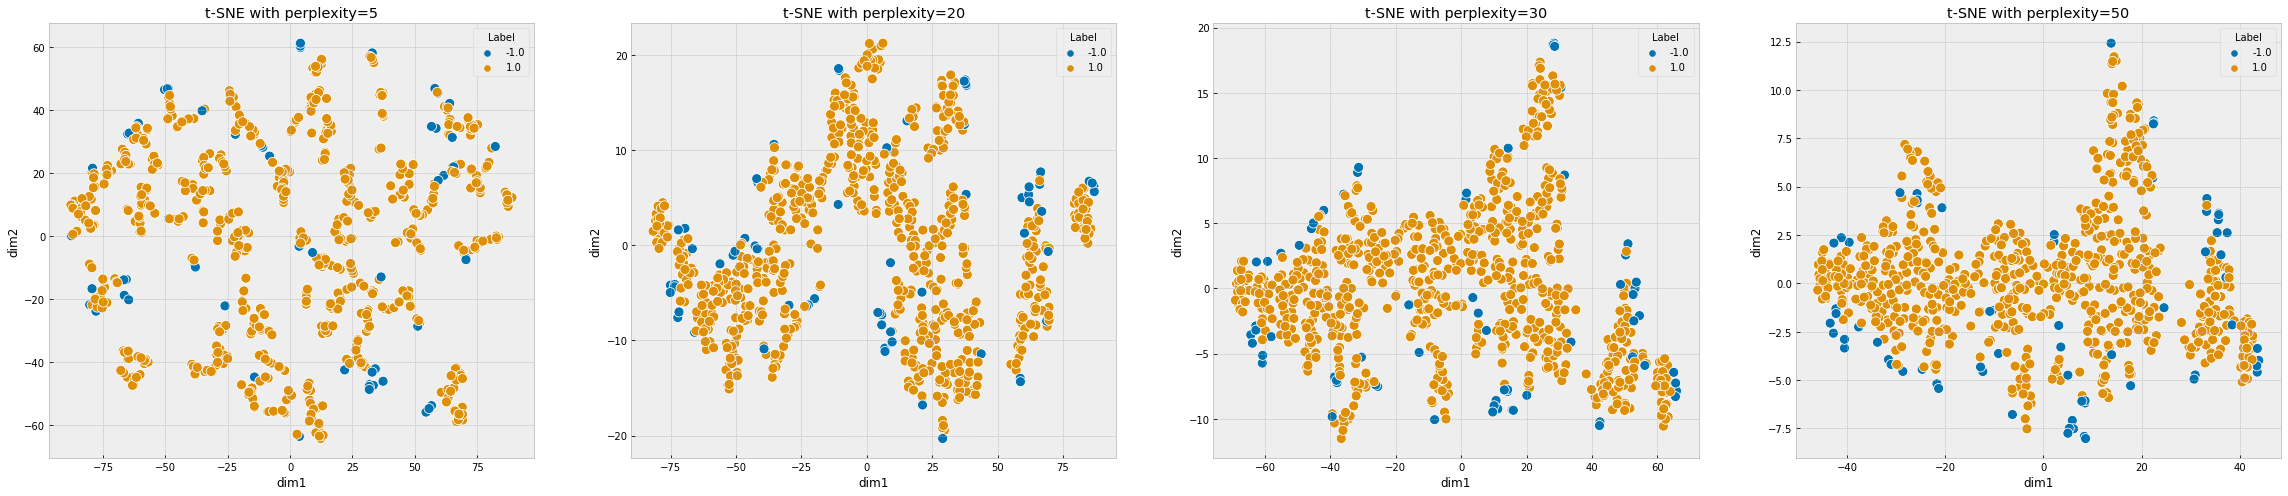

In [50]:
plot_tSNE(X_new, y_new)

### Q.9

Build recommendation mechanism to find if given observation is an outlier.

In [53]:
clf = AdaBoostClassifier()
clf.fit(X_new, y_new)

AdaBoostClassifier()

In [54]:
X_new

,Total,Defense,HP,Sp. Def
0,318,49,45,65
1,405,63,60,80
2,525,83,80,100
3,625,123,80,120
4,309,43,39,50
...,...,...,...,...
795,600,150,50,150
796,700,110,50,110
797,600,60,80,130
798,680,60,80,130


In [58]:
def predict_outlier_pokemon(model, total, defense, HP, speed):
    to_predict = [
        total,
        defense,
        HP,
        speed
    ]
    predicted_value = model.predict([to_predict])[0]
    if predicted_value == 1:
        return "Not Outlier"
    return "Outlier"

In [59]:
predict_outlier_pokemon(clf, 500, 100, 50, 70)

/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


'Not Outlier'

In [64]:
predict_outlier_pokemon(clf, 800, 184, 150, 150)

/Users/orperets/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


'Outlier'

In [63]:
X[X["isOutlier"] == -1]

,Total,Defense,HP,Sp. Def,isOutlier
44,270,20,115,25,-1
45,435,45,140,50,-1
55,265,25,10,45,-1
68,310,15,25,55,-1
78,335,35,40,100,-1
...,...,...,...,...,...
738,371,47,54,98,-1
739,552,68,78,154,-1
750,520,50,60,50,-1
789,514,184,95,46,-1
